# Creating image to latex code dataset

The goal of this notebook is to explain you how to build your own mathematical-formula/latex-equivalent datasets.

## Generating latex code

To build a mathematical latex formula, we need to create a file text with all the necessary information to compile it into an To build a mathematical LaTeX formula, we need to create a text file containing all the necessary information to compile it into an image (PDF). First, we must define the required packages in the header of the text file. Then, we add `\begin{document}`, followed by the code for the mathematical formula, and finally, `\end{document}`.  

Note that in Python, to print a backslash (`\`), we need to use a double backslash (`\\`). The `\\[` and `\\]` delimit the mathematical formula in LaTeX code.

In [277]:
header = """
\\documentclass[11pt,a4paper]{article}
\\usepackage[utf8]{inputenc}
\\usepackage[T1]{fontenc}
\\usepackage{hyperref}
\\usepackage{lmodern}
\\usepackage[english]{babel}
\\usepackage{appendix}
\\usepackage{enumitem}
\\usepackage{amsfonts}
\\usepackage{amsmath}
\\usepackage{amssymb}
\\usepackage{mathabx}
\\usepackage{bbm}

\\pagenumbering{gobble} 

\\begin{document}
\\[
"""

footer = """
\\]
\\end{document}
"""

Then we need to generate the code randomly. We will first define all the symbol that we want (you can obiously add the one you want).

In [278]:
characters = [str(i) for i in range(10)] + [chr(i+97) for i in range(26)] + [chr(i+65) for i in range(26)]
symbols = ["=", ">", "<", "\\leq", "\\geq", "\\equiv", "\\sim", "(", ")", "[", "]", "\\{", "\\}", "\\emptyset", "\\infty", "+",
           "-", "\\pi", "\\Pi", "\\sum", "\\times", "\\sigma", "\\rho", "log", "exp"]
functions1 = ["\\sqrt", "^", "_", "\\mathcal"]
functions2 = ["\\frac", "\\underset", "\\overset"]

print(characters)
print(symbols)
print(functions1)
print(functions2)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
['=', '>', '<', '\\leq', '\\geq', '\\equiv', '\\sim', '(', ')', '[', ']', '\\{', '\\}', '\\emptyset', '\\infty', '+', '-', '\\pi', '\\Pi', '\\sum', '\\times', '\\sigma', '\\rho', 'log', 'exp']
['\\sqrt', '^', '_', '\\mathcal']
['\\frac', '\\underset', '\\overset']


Then, we will randomly generate a formula based on the previous list we have defined.

In [279]:
import random as rd 

class Config:
    """Configuration class to generate mathematical formula"""
    lenght_min = 4 # minimal lenght of a formula, i.e. numbers of symbols and characters
    lenght_max = 20 # maximal lenght of a formula

    f1_min = 1 # minimal number of formula1
    f1_max = 2 # maximal number of formula1

    f2_min = 0 # minimal number of formula2
    f2_max = 1 # maximal number of formula2

    

def gen_info():
    l = rd.randint(Config.lenght_min, Config.lenght_max)
    l1 = rd.randint(Config.f1_min, Config.f1_max)
    l2 = rd.randint(Config.f2_min, Config.f2_max)
    return l, l1, l2


def create_formula():
    l, l1, l2 = gen_info()

    res = [" " + rd.choice(characters+symbols) for _ in range(l)]
    for _ in range(l1):
        id = rd.randint(1, len(res)-2)
        n = rd.randint(id+1, len(res))-id

        word = " " + rd.choice(functions1) + "{"
        for j in range(id,id+n):
            word += res[j]
        word += " }"
        
        res = [x for j,x in enumerate(res) if not (id<=j and j<=id+n)]
        res.insert(id, word)
        #print(id, id+n)

    for _ in range(l2):
        try:
            id = rd.randint(0, len(res)-3)
            n = rd.randint(id+1, len(res)-1)-id
            m = rd.randint(id+n+1, len(res))-id-n

            word = " " + rd.choice(functions2) + "{"
            for j in range(id,id+n):
                word += res[j]
            word += " }{ "
            for j in range(id+n,id+n+m):
                word += " " + res[j]
            word += " }"
            
            res = [x for j,x in enumerate(res) if not (id<=j and j<=id+n+m)]
            res.insert(id, word)
            #print(id, id+n)
        except ValueError:
            pass

    formula = ""
    for x in res:
        formula += x
    return formula

formula = create_formula()
print(formula)


 - \} ] \sqrt{ \sigma t ( N \infty - H }


Now, we can create our full `.tex` document.

In [280]:
tex_doc_str = header + formula + footer
print(tex_doc_str)

file_name = "doc1"
f = open(file_name + ".tex", "w")
f.write(tex_doc_str)
f.close()


\documentclass[11pt,a4paper]{article}
\usepackage[utf8]{inputenc}
\usepackage[T1]{fontenc}
\usepackage{hyperref}
\usepackage{lmodern}
\usepackage[english]{babel}
\usepackage{appendix}
\usepackage{enumitem}
\usepackage{amsfonts}
\usepackage{amsmath}
\usepackage{amssymb}
\usepackage{mathabx}
\usepackage{bbm}

\pagenumbering{gobble} 

\begin{document}
\[
 - \} ] \sqrt{ \sigma t ( N \infty - H }
\]
\end{document}



## Compile .tex document to pdf

Then, we need to compile our latex formula to a pdf image. For that we need to install `TexLive`. To install TexLive, run the following command lines in your terminal:

`sudo apt-get install texlive-latex-base`

`sudo apt-get install texlive-fonts-recommended`

`sudo apt-get install texlive-fonts-extra`

`sudo apt-get install texlive-latex-extra`

In [281]:
import os

os.system("pdflatex " + file_name + ".tex")

This is pdfTeX, Version 3.141592653-2.6-1.40.25 (TeX Live 2023/Debian) (preloaded format=pdflatex)
 restricted \write18 enabled.
entering extended mode
(./doc1.tex
LaTeX2e <2023-11-01> patch level 1
L3 programming layer <2024-01-22>
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2023/05/17 v1.4n Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size11.clo))
(/usr/share/texlive/texmf-dist/tex/latex/base/inputenc.sty)
(/usr/share/texlive/texmf-dist/tex/latex/base/fontenc.sty)
(/usr/share/texlive/texmf-dist/tex/latex/hyperref/hyperref.sty
(/usr/share/texlive/texmf-dist/tex/generic/iftex/iftex.sty)
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/share/texlive/texmf-dist/tex/latex/kvsetkeys/kvsetkeys.sty)
(/usr/share/texlive/texmf-dist/tex/generic/kvdefinekeys/kvdefinekeys.sty)
(/usr/share/texlive/texmf-dist/tex/generic/pdfescape/pdfescape.sty
(/usr/share/texlive/texmf-dist/tex/generic/ltxcmds/ltxcmds.sty)
(/us

0

This will create four files: `.pdf`, `.aux`, `.out` and `.log`. The only one we are insterested in is the `.pdf` one.

## Computing cleaner image

Then, we want to convert our pdf to a cropped image (numpy array). But first we need to convert our pdf to a usable format like `.png`. See the notebook about image dataset for better understanding.

In [282]:
from pdf2image import convert_from_path

pages = convert_from_path(file_name + ".pdf")

for count, page in enumerate(pages):
    # We have only one page
    page.save(f'{file_name}.png', 'PNG')

<class 'numpy.ndarray'>


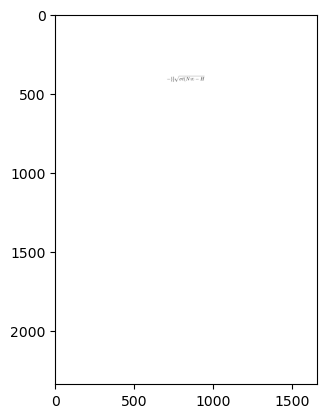

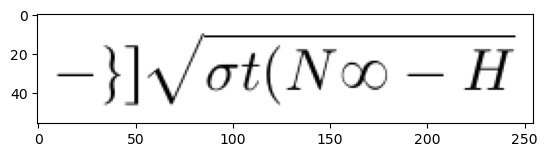

<class 'list'>


In [283]:
import matplotlib.pyplot as plt
import numpy as np  
import cv2

def gray_level(img):
    return img[:,:,0]/3 + img[:,:,1]/3 + img[:,:,2]/3

def crop(img, wb=0.95, k=0):
    n,m = img.shape
    _, thresh = cv2.threshold(img, wb, 255, cv2.THRESH_BINARY_INV)
    white_pt_coords = np.argwhere(thresh)

    x = min(white_pt_coords[:,0])
    y = min(white_pt_coords[:,1])
    X = max(white_pt_coords[:,0])
    Y = max(white_pt_coords[:,1])

    return img[max(x-k,0):min(X+k,n), max(y-k,0):min(Y+k,m)]


img = plt.imread(file_name + ".png")
print(type(img))
plt.imshow(img)
plt.show()

cropped = crop(gray_level(img), wb=0.95, k=10)
plt.imshow(cropped, cmap="gray")
plt.show()

img = img.tolist()
print(type(img))

## Creating dataset

We finally want to create a dataset wich will be a map containing two fields.

In [285]:
ds = {"images":[], "latex-formula":[]}

Then we add all the images and corresponding latex-formula we want.

In [286]:
ds["images"].append(img)
ds["latex-formula"].append(formula)

Finally we save our dataset thanks to the `json` package.

In [287]:
import json

json_object = json.dumps(ds)

ds_name = "files/image-latex-datasets.json"
with open(ds_name, "w") as f :
    f.write(json_object)

To open your dataset, do this:

In [288]:
with open(ds_name, 'r') as f:
    data = json.load(f)

print(data["latex-formula"])

[' - \\} ] \\sqrt{ \\sigma t ( N \\infty - H }']
